In [45]:
import main
import adaptive
from importlib import reload

mean = lambda x : sum(x)/len(x)

def runSim (name, printRes):
    
    reload(main)
    reload(adaptive)
    if printRes: print(name)
    results = []
    

    foo = False

    for i in [main, adaptive]:


        data = i.departed
        waitingData = i.waitingInLane
        waitingData.pop()


        arrTimeData = [i.time for i in data]
        arrTimeData.sort()
        interArrivalTimes = [arrTimeData[0]]

        timeWaiting = [ i.accel - i.time for i in data]
        timeSpent = [ i.departTime - i.time for i in data]

        for i in range(1, len(arrTimeData)): 
            interArrivalTimes.append(arrTimeData[i] - arrTimeData[i - 1])


        
        
        results.append([mean(interArrivalTimes), mean(timeWaiting), mean(timeSpent), mean(waitingData), max(waitingData)])

        if printRes:
            if not foo: print('-MAIN-')
            else: print('-ADAPTIVE-')
            print('Number of cars', len(data))
            print('Mean inter arrival times',mean(interArrivalTimes))
            print('Mean time waiting in lane', mean(timeWaiting))
            print('Mean time spent in intersection', mean(timeSpent))
            print('Mean cars waiting in lanes',mean(waitingData))
            print('Max cars waiting in lanes',max(waitingData))
            print()

        foo = True
    return results





In [42]:
#UNBALANCED INSTANT SWITCHING PEAK HOURS

import parameters

def setParamsRun(setParams):

    printRes = False

    seedResults = []

    parameters.params = setParams

    seedResults.append(runSim('UNBALANCED INSTANT SWITCHING PEAK HOURS 1', printRes))

    parameters.params['randomSeed'] = 11

    seedResults.append(runSim('UNBALANCED INSTANT SWITCHING PEAK HOURS 2', printRes))

    parameters.params['randomSeed'] = 12

    seedResults.append(runSim('UNBALANCED INSTANT SWITCHING PEAK HOURS 3', printRes))

    parameters.params['randomSeed'] = 13

    seedResults.append(runSim('UNBALANCED INSTANT SWITCHING PEAK HOURS 4', printRes))

    parameters.params['randomSeed'] = 14

    seedResults.append(runSim('UNBALANCED INSTANT SWITCHING PEAK HOURS 5', printRes))
    
    return seedResults



### Results for varying traffic balance

In [111]:
def dirWeightRun(scaleFactor):

    dScale = [0.25+scaleFactor, 0.25-scaleFactor]

    params = {
        'PRINT_EVENTS' : False,
        'NUM_CARS' : 2286,
        'ARR_PER_HOUR' : 2286,
        'SERVICE_TIME' : 1/8,
        'NUM_RUNS' : 10,
        'lightInterval' : [0.6, 0.4],
        'directionWeights' : [dScale[0], dScale[1], dScale[0], dScale[1]],
        'instantSwitching' : True,
        'randomSeed' : 10
    }
    
    results = setParamsRun(params)
    
    meanResults = [
        (mean([i[0][j] for i in results]), mean([i[1][j] for i in results])) for j in range(5)
    ]
    
    
    return meanResults



x = [1, 2, 3, 4, 5, 6, 7]

scaleFactors = [0.24, 0.2, 0.15, 0.1, 0.05, 0.01, 0]
y =[]

for i in range(len(x)):
     y.append(dirWeightRun(scaleFactors[i]))
    





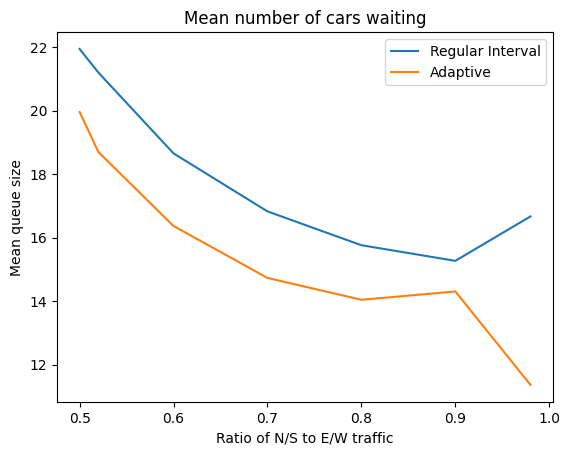

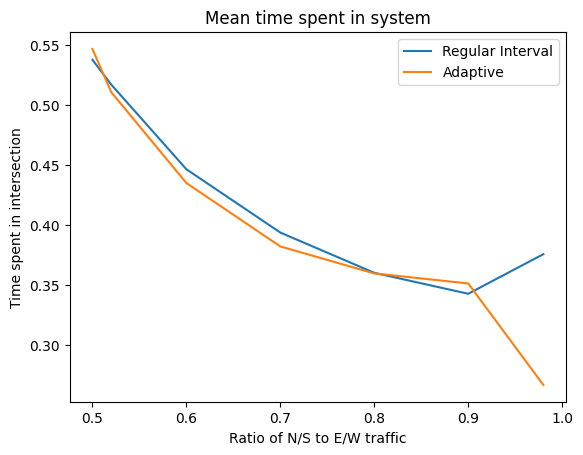

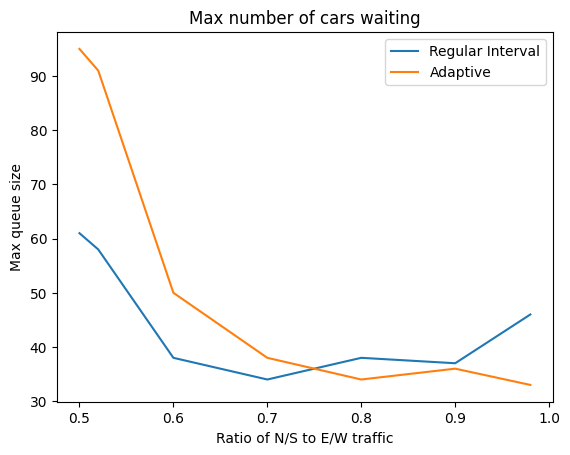

In [112]:
import matplotlib.pyplot as plt

X = [0.98, 0.9, 0.8, 0.7, 0.6, 0.52, 0.5]
X.sort(reverse=True)

line1, line2 = plt.plot(X,[i[3] for i in y])
line1.set_label('Regular Interval')
line2.set_label('Adaptive')
plt.xlabel('Ratio of N/S to E/W traffic',)
plt.ylabel('Mean queue size')
plt.title('Mean number of cars waiting')
plt.legend()
plt.show()

line1, line2 = plt.plot(X,[i[2] for i in y])
line1.set_label('Regular Interval')
line2.set_label('Adaptive')
plt.xlabel('Ratio of N/S to E/W traffic')
plt.ylabel('Time spent in intersection')
plt.title('Mean time spent in system')
plt.legend()
plt.show()

line1, line2 = plt.plot(X,[i[4] for i in y])
line1.set_label('Regular Interval')
line2.set_label('Adaptive')
plt.xlabel('Ratio of N/S to E/W traffic')
plt.ylabel('Max queue size')
plt.title('Max number of cars waiting')
plt.legend()
plt.show()

### Results for increasing traffic levels

In [117]:
def trafficLevelRun(tLevel):

    dScale = [0.3, 0.2]

    params = {
        'PRINT_EVENTS' : False,
        'NUM_CARS' : tLevel,
        'ARR_PER_HOUR' : tLevel,
        'SERVICE_TIME' : 1/8,
        'NUM_RUNS' : 10,
        'lightInterval' : [0.6, 0.4],
        'directionWeights' : [dScale[0], dScale[1], dScale[0], dScale[1]],
        'instantSwitching' : True,
        'randomSeed' : 10
    }
    
    results = setParamsRun(params)
    
    meanResults = [
        (mean([i[0][j] for i in results]), mean([i[1][j] for i in results])) for j in range(5)
    ]
    
    
    return meanResults



x = [400, 800, 1200, 1600, 2000, 2286, 2400]


y =[]

for i in range(len(x)):
     y.append(trafficLevelRun(x[i]))
    





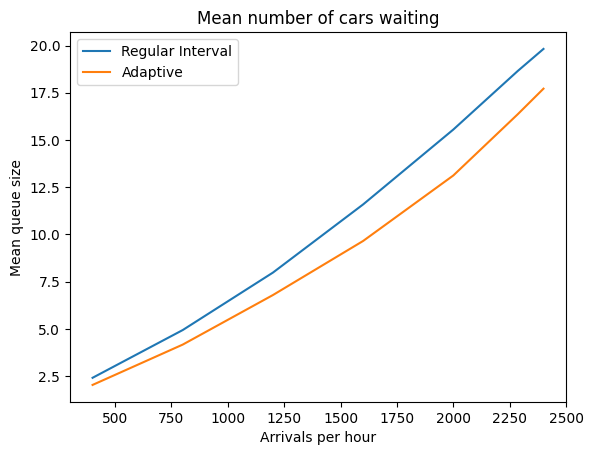

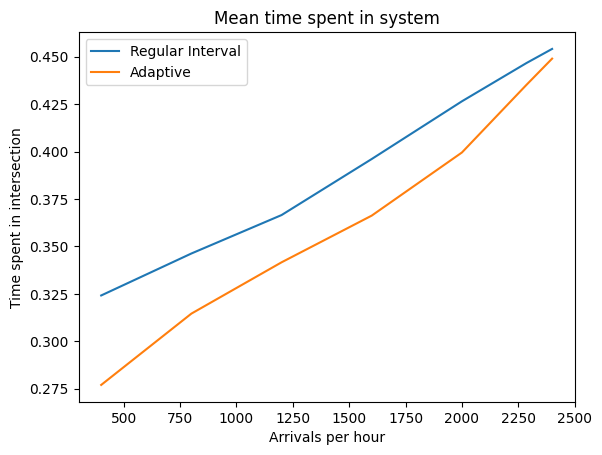

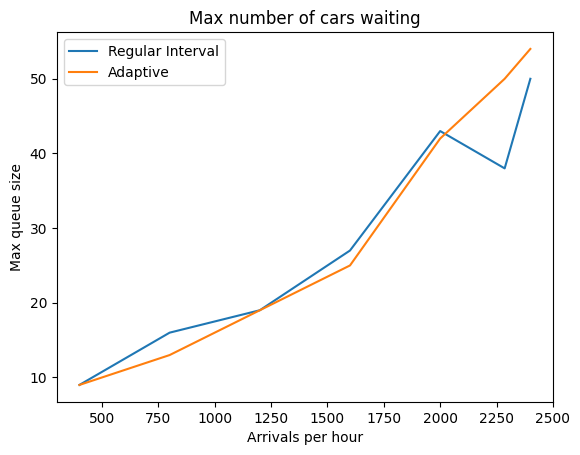

In [119]:
import matplotlib.pyplot as plt

X = [0.98, 0.9, 0.8, 0.7, 0.6, 0.52, 0.5]
X.sort(reverse=True)

line1, line2 = plt.plot(x,[i[3] for i in y])
line1.set_label('Regular Interval')
line2.set_label('Adaptive')
plt.xlabel('Arrivals per hour',)
plt.ylabel('Mean queue size')
plt.title('Mean number of cars waiting')
plt.legend()
plt.show()

line1, line2 = plt.plot(x,[i[2] for i in y])
line1.set_label('Regular Interval')
line2.set_label('Adaptive')
plt.xlabel('Arrivals per hour')
plt.ylabel('Time spent in intersection')
plt.title('Mean time spent in system')
plt.legend()
plt.show()

line1, line2 = plt.plot(x,[i[4] for i in y])
line1.set_label('Regular Interval')
line2.set_label('Adaptive')
plt.xlabel('Arrivals per hour')
plt.ylabel('Max queue size')
plt.title('Max number of cars waiting')
plt.legend()
plt.show()